In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('Indian_housing_Delhi_data.csv')
data.shape

(5000, 16)

In [3]:
data.head(10)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
5,3 BHK Apartment,750 sq ft,DLF Farms,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 3 bhk multistorey apartment is a...,No Deposit,Semi-Furnished
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Itâs a 3 bhk builder floor situated in laxmi...,No Deposit,Furnished
7,3 BHK Independent Floor,"1,200 sq ft",Swasthya Vihar,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 3 bhk builder floor is available...,No Deposit,Furnished
8,3 BHK Independent House,"1,100 sq ft",Janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A spacious 3 bhk independent house is availabl...,No Deposit,Semi-Furnished
9,4 BHK Independent Floor,"2,500 sq ft",Pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,NaN,NaN,Posted 2 months ago,A spacious 4 bhk builder floor is available fo...,No Deposit,Semi-Furnished


## Understanding the Data

In [4]:
## printing the column names
column_names = data.columns
column_names

Index(['house_type', 'house_size', 'location', 'city', 'latitude', 'longitude',
       'price', 'currency', 'numBathrooms', 'numBalconies', 'isNegotiable',
       'priceSqFt', 'verificationDate', 'description', 'SecurityDeposit',
       'Status'],
      dtype='object')

In [5]:
## Getting the infornmation of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   house_type        5000 non-null   object 
 1   house_size        5000 non-null   object 
 2   location          5000 non-null   object 
 3   city              5000 non-null   object 
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   price             5000 non-null   int64  
 7   currency          5000 non-null   object 
 8   numBathrooms      4975 non-null   float64
 9   numBalconies      2737 non-null   float64
 10  isNegotiable      179 non-null    object 
 11  priceSqFt         0 non-null      float64
 12  verificationDate  5000 non-null   object 
 13  description       4715 non-null   object 
 14  SecurityDeposit   5000 non-null   object 
 15  Status            5000 non-null   object 
dtypes: float64(5), int64(1), object(10)
memory

In [6]:
## Calculating the percentage of missing values of each column
data.isnull().sum()/len(data)*100

house_type            0.00
house_size            0.00
location              0.00
city                  0.00
latitude              0.00
longitude             0.00
price                 0.00
currency              0.00
numBathrooms          0.50
numBalconies         45.26
isNegotiable         96.42
priceSqFt           100.00
verificationDate      0.00
description           5.70
SecurityDeposit       0.00
Status                0.00
dtype: float64

In [7]:
data.describe()

,latitude,longitude,price,numBathrooms,numBalconies,priceSqFt
count,5000.000000,5000.000000,5.000000e+03,4975.000000,2737.000000,0.0
mean,28.578012,77.174499,2.221738e+05,2.918593,1.954330,NaN
std,0.190186,0.115636,2.739843e+05,1.087823,0.547219,NaN
min,20.011379,72.771332,3.000000e+03,1.000000,1.000000,NaN
25%,28.544489,77.138248,2.950000e+04,2.000000,2.000000,NaN
50%,28.569295,77.196472,1.250000e+05,3.000000,2.000000,NaN
75%,28.618687,77.228950,3.011020e+05,4.000000,2.000000,NaN
max,28.805466,80.361313,3.010101e+06,10.000000,8.000000,NaN


In [8]:
for col_name in column_names:
    print('*'*20, col_name, '*'*20)
    print(f"cardinality of {col_name} {data[col_name].nunique()}")
    print()
    print(f"unique values of {col_name} {data[col_name].unique()}")
    print()

******************** house_type ********************
cardinality of house_type 28

unique values of house_type ['1 RK Studio Apartment ' '2 BHK Independent Floor '
 '3 BHK Independent House ' '2 BHK Apartment ' '3 BHK Apartment '
 '3 BHK Independent Floor ' '4 BHK Independent Floor '
 '1 BHK Independent Floor ' '1 BHK Apartment ' '8 BHK Independent Floor '
 '4 BHK Apartment ' '6 BHK Independent Floor ' '2 BHK Independent House '
 '1 BHK Independent House ' '5 BHK Independent Floor '
 '4 BHK Independent House ' '5 BHK Villa ' '5 BHK Independent House '
 '7 BHK Independent Floor ' '8 BHK Independent House '
 '10 BHK Independent House ' '7 BHK Independent House '
 '9 BHK Independent House ' '8 BHK Villa ' '4 BHK Villa '
 '5 BHK Apartment ' '6 BHK penthouse ' '12 BHK Independent House ']

******************** house_size ********************
cardinality of house_size 339

unique values of house_size ['400 sq ft' '500 sq ft' '1,020 sq ft' '810 sq ft' '750 sq ft'
 '1,300 sq ft' '1,200 sq ft' 

In [9]:
data['location'] = data['location'].str.lower()

In [10]:
## stroing locations for future use
train_locations = data['location'].unique()

## Cleaning the Data

In [11]:
## Correcting the Data Type(house_size)
data['house_size(sq_ft)'] = data['house_size'].str.split().str[0].str.replace(',','').astype(int)

In [12]:
## Splitting the no.of BHK's and property type from (house_type)
data['house_type'] = data['house_type'].str.strip()
data['BHK'] = data['house_type'].str.split().str[0].astype(int)
data['property_type'] = data['house_type'].str.split().str[-1]

In [13]:
## Replacing the "No Deposit" value to 0 in 'SecurityDeposit' column
data['SecurityDeposit'] = data['SecurityDeposit'].str.strip()
data['SecurityDeposit'] = data['SecurityDeposit'].str.replace(',', '').replace('No Deposit', '0').astype(int)

In [14]:
## Converting into days of 'verificationDate'
import re

def convert_to_days(text):
    if 'minute' in text:
        minutes = int(re.search(r'(\d+)', text).group()) if re.search(r'(\d+)', text) else 1
        return minutes / 1440  # Convert minutes to days
    elif 'hour' in text:
        hours = int(re.search(r'(\d+)', text).group()) if re.search(r'(\d+)', text) else 1
        return hours / 24  # Convert hours to days
    elif 'day' in text:
        days = int(re.search(r'(\d+)', text).group()) if re.search(r'(\d+)', text) else 1
        return days
    elif 'month' in text:
        months = int(re.search(r'(\d+)', text).group()) if re.search(r'(\d+)', text) else 1
        return months * 30  # Approximate months as 30 days
    elif 'year' in text:
        years = int(re.search(r'(\d+)', text).group()) if re.search(r'(\d+)', text) else 1
        return years * 365  # Approximate years as 365 days
    return 0
1

1

In [15]:
data['verification_in_days'] = data['verificationDate'].apply(convert_to_days)

In [16]:
data.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,verification_in_days
0,1 RK Studio Apartment,400 sq ft,kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,Furnished,400,1,Apartment,1.0
1,1 RK Studio Apartment,400 sq ft,mansarover garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,Furnished,400,1,Apartment,9.0
2,2 BHK Independent Floor,500 sq ft,uttam nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,Semi-Furnished,500,2,Floor,12.0
3,3 BHK Independent House,"1,020 sq ft",model town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,Furnished,1020,3,House,365.0
4,2 BHK Apartment,810 sq ft,sector 13 rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,Unfurnished,810,2,Apartment,365.0


## EDA

<Axes: title={'center': 'isNegotiable'}, xlabel='isNegotiable', ylabel='count'>

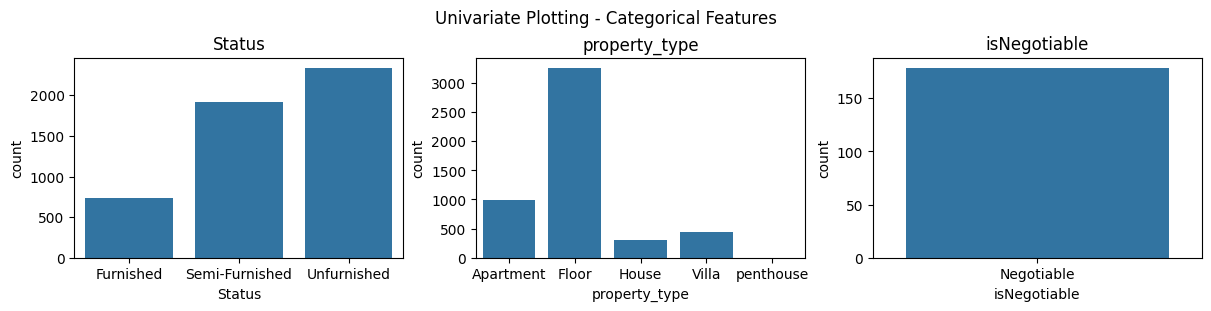

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("Status")
sns.countplot(data=data, x='Status', ax=axs[0])

axs[1].set_title("property_type")
sns.countplot(data=data, x='property_type', ax=axs[1])

axs[2].set_title("isNegotiable")
sns.countplot(data=data, x='isNegotiable', ax=axs[2])

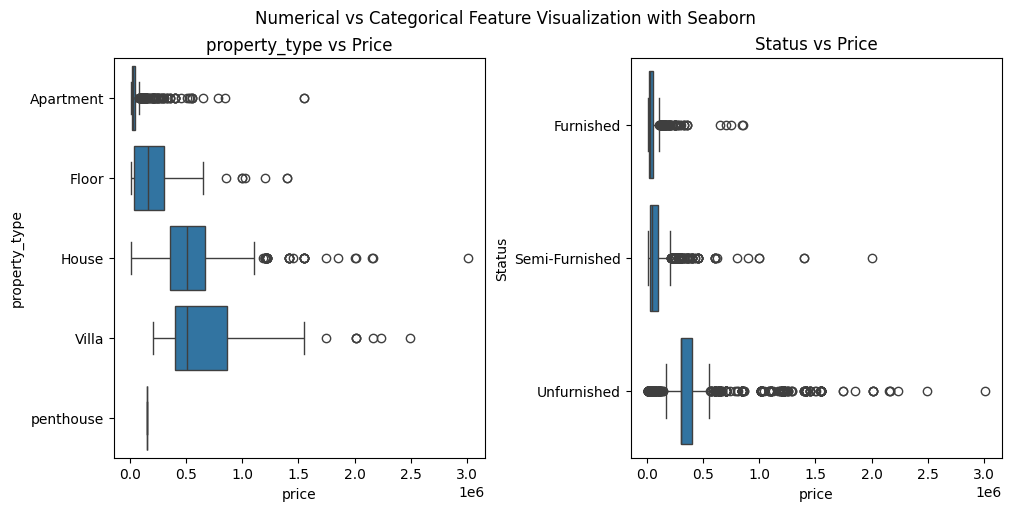

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("property_type vs Price")
sns.boxplot(data=data, x='price', y='property_type', ax=axs[0])

axs[1].set_title("Status vs Price")
sns.boxplot(data=data, x='price', y='Status', ax=axs[1])

plt.show()

In [19]:
import pandas as pd

# Group by 'location' and calculate the mean of 'price'
location_price_mean = data.groupby('location')['price'].mean()

# Sort the locations by price in descending order and get the top 10
top_10_locations = location_price_mean.sort_values(ascending=False).head(10)
# Format the numbers to display them in lakhs
top_10_locations_formatted = top_10_locations.apply(lambda x: f'{x / 1e5:.2f} Lakhs')

# Display the formatted result
print(top_10_locations_formatted)

# Display the result
print(top_10_locations)


location
central ridge reserve forest    20.00 Lakhs
kasturba gandhi marg            14.82 Lakhs
aurungzeb road                  14.32 Lakhs
amrita shergill marg            14.00 Lakhs
lodhi road                      13.75 Lakhs
malcha marg                     13.64 Lakhs
tuglak road                     13.63 Lakhs
babar road                      13.19 Lakhs
prithviraj road                 12.55 Lakhs
tilak marg                      12.44 Lakhs
Name: price, dtype: object
location
central ridge reserve forest    2.000000e+06
kasturba gandhi marg            1.481532e+06
aurungzeb road                  1.431967e+06
amrita shergill marg            1.399905e+06
lodhi road                      1.375466e+06
malcha marg                     1.363920e+06
tuglak road                     1.362583e+06
babar road                      1.319128e+06
prithviraj road                 1.255258e+06
tilak marg                      1.244405e+06
Name: price, dtype: float64


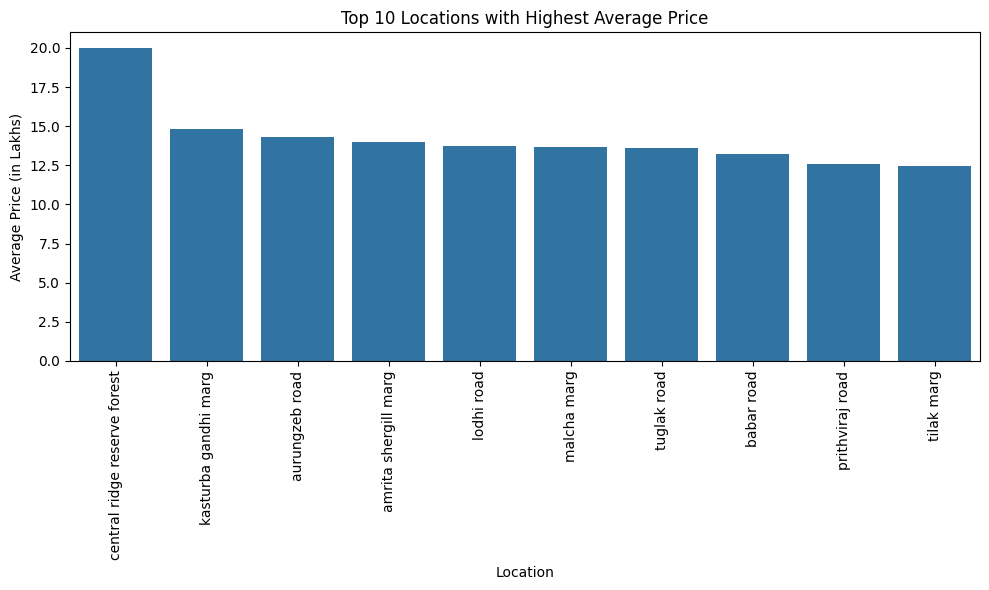

In [20]:
# Convert the prices to lakhs for plotting
top_10_locations_in_lakhs = top_10_locations / 1e5

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_locations_in_lakhs.index, y=top_10_locations_in_lakhs.values)

# Add labels and title
plt.xlabel('Location')
plt.ylabel('Average Price (in Lakhs)')
plt.title('Top 10 Locations with Highest Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


<Axes: xlabel='price', ylabel='location'>

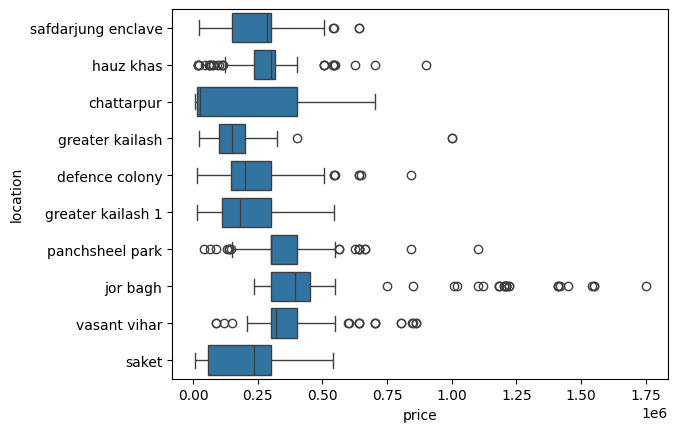

In [21]:
# Get the top 10 most frequent locations
top_locations = data['location'].value_counts().head(10).index

# Filter the data to include only these top locations
filtered_data = data[data['location'].isin(top_locations)]

# Create the boxplot
sns.boxplot(x='price', y='location', data=filtered_data)


In [22]:
data.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,verification_in_days
0,1 RK Studio Apartment,400 sq ft,kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,Furnished,400,1,Apartment,1.0
1,1 RK Studio Apartment,400 sq ft,mansarover garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,Furnished,400,1,Apartment,9.0
2,2 BHK Independent Floor,500 sq ft,uttam nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,Semi-Furnished,500,2,Floor,12.0
3,3 BHK Independent House,"1,020 sq ft",model town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,Furnished,1020,3,House,365.0
4,2 BHK Apartment,810 sq ft,sector 13 rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,Unfurnished,810,2,Apartment,365.0


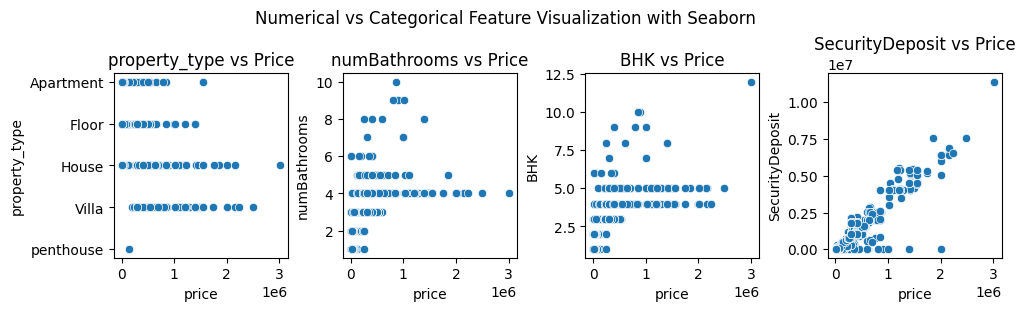

In [23]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("property_type vs Price")
sns.scatterplot(data=data, x='price', y='property_type', ax=axs[0])

axs[1].set_title("numBathrooms vs Price")
sns.scatterplot(data=data, x='price', y='numBathrooms', ax=axs[1])

axs[2].set_title("BHK vs Price")
sns.scatterplot(data=data, x='price', y='BHK', ax=axs[2])

axs[3].set_title("SecurityDeposit vs Price")
sns.scatterplot(data=data, x='price', y='SecurityDeposit', ax=axs[3])

plt.show()

## Data Preparation

In [24]:
## Using the longitudes and latitudes finding the distance(Kms) form city centre
from geopy.distance import geodesic

# Example: New Delhi city center coordinates
city_center = (28.6139, 77.2090)

# Calculate distance from city center for each row in the dataset
data['distance_from_center'] = data[['latitude', 'longitude']].apply(
    lambda x: geodesic((x['latitude'], x['longitude']), city_center).km, axis=1)

In [25]:
from sklearn.cluster import KMeans

# Using lat-long for clustering locations
kmeans = KMeans(n_clusters=10)  # Choose the number of clusters based on your data
data['location_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])


In [26]:
data.head(10)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,...,verificationDate,description,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,verification_in_days,distance_from_center,location_cluster
0,1 RK Studio Apartment,400 sq ft,kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,...,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",0,Furnished,400,1,Apartment,1.0,8.777651,2
1,1 RK Studio Apartment,400 sq ft,mansarover garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,...,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,0,Furnished,400,1,Apartment,9.0,8.128220,9
2,2 BHK Independent Floor,500 sq ft,uttam nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,...,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",0,Semi-Furnished,500,2,Floor,12.0,15.231011,0
3,3 BHK Independent House,"1,020 sq ft",model town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,...,Posted a year ago,Itâs a 3 bhk independent house situated in M...,0,Furnished,1020,3,House,365.0,11.332293,5
4,2 BHK Apartment,810 sq ft,sector 13 rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,...,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,0,Unfurnished,810,2,Apartment,365.0,14.323268,5
5,3 BHK Apartment,750 sq ft,dlf farms,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,...,Posted 2 years ago,Well designed 3 bhk multistorey apartment is a...,0,Semi-Furnished,750,3,Apartment,730.0,14.837071,8
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,...,Posted 3 years ago,Itâs a 3 bhk builder floor situated in laxmi...,0,Furnished,1300,3,Floor,1095.0,6.397190,7
7,3 BHK Independent Floor,"1,200 sq ft",swasthya vihar,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,...,Posted 3 years ago,Well designed 3 bhk builder floor is available...,0,Furnished,1200,3,Floor,1095.0,7.954713,7
8,3 BHK Independent House,"1,100 sq ft",janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,...,Posted 3 years ago,A spacious 3 bhk independent house is availabl...,0,Semi-Furnished,1100,3,House,1095.0,11.565564,9
9,4 BHK Independent Floor,"2,500 sq ft",pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,...,Posted 2 months ago,A spacious 4 bhk builder floor is available fo...,0,Semi-Furnished,2500,4,Floor,60.0,12.219736,5


In [27]:
location_counts = data['location'].value_counts()
location_counts

location
defence colony        189
greater kailash 1     153
chattarpur            145
vasant vihar          145
jor bagh              125
                     ... 
dilshad garden          1
new rajendra nagar      1
b 5 block               1
sector 17 dwarka        1
dda flat                1
Name: count, Length: 288, dtype: int64

In [28]:
rare_locations = location_counts[location_counts <= 5].index

In [29]:
data['location'] = data['location'].apply(lambda value: 'Others' if value in rare_locations else  value)

In [30]:
from sklearn.model_selection import KFold
n_folds = 5
kf = KFold(n_splits = n_folds, shuffle = True, random_state = 42)

In [31]:
data['location_mean_encoded'] = np.nan
data['location_rank-encoded'] = np.nan

In [32]:
for train_index, val_index in kf.split(data):
    data_train, data_val = data.iloc[train_index], data.iloc[val_index]

    ## Target mean encoding
    ## Calculating the mean price for each location in the data_train
    location_means = data_train.groupby('location')['price'].mean()

    ## Applying same for the validation set
    data.loc[val_index, 'location_mean_encoded'] = data_val['location'].map(location_means)

    ## Rank-Based Encoding
    ## Calculate mean price and sort them to assign ranks (ordinal encoding)
    location_ranks = data_train.groupby('location')['price'].mean().rank().to_dict()
    
    ## Apply the rank encoding to the validation set
    data.loc[val_index, 'location_rank_encoded'] = data_val['location'].map(location_ranks)



In [33]:
data.head(10)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,...,Status,house_size(sq_ft),BHK,property_type,verification_in_days,distance_from_center,location_cluster,location_mean_encoded,location_rank-encoded,location_rank_encoded
0,1 RK Studio Apartment,400 sq ft,kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,...,Furnished,400,1,Apartment,1.0,8.777651,2,55066.666667,NaN,65.0
1,1 RK Studio Apartment,400 sq ft,mansarover garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,...,Furnished,400,1,Apartment,9.0,8.128220,9,51250.000000,NaN,64.0
2,2 BHK Independent Floor,500 sq ft,uttam nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,...,Semi-Furnished,500,2,Floor,12.0,15.231011,0,15316.898305,NaN,9.0
3,3 BHK Independent House,"1,020 sq ft",model town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,...,Furnished,1020,3,House,365.0,11.332293,5,19800.000000,NaN,16.0
4,2 BHK Apartment,810 sq ft,Others,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,...,Unfurnished,810,2,Apartment,365.0,14.323268,5,97598.315412,NaN,71.0
5,3 BHK Apartment,750 sq ft,Others,Delhi,28.488153,77.156975,11000,INR,1.0,NaN,...,Semi-Furnished,750,3,Apartment,730.0,14.837071,8,97598.315412,NaN,71.0
6,3 BHK Independent Floor,"1,300 sq ft",laxmi nagar,Delhi,28.635509,77.269661,20000,INR,2.0,NaN,...,Furnished,1300,3,Floor,1095.0,6.397190,7,17133.333333,NaN,13.0
7,3 BHK Independent Floor,"1,200 sq ft",Others,Delhi,28.641640,77.284027,35000,INR,2.0,NaN,...,Furnished,1200,3,Floor,1095.0,7.954713,7,87060.113208,NaN,70.0
8,3 BHK Independent House,"1,100 sq ft",janakpuri,Delhi,28.621193,77.091026,39000,INR,2.0,NaN,...,Semi-Furnished,1100,3,House,1095.0,11.565564,9,32639.705882,NaN,42.0
9,4 BHK Independent Floor,"2,500 sq ft",pitampura,Delhi,28.696100,77.125694,90000,INR,4.0,NaN,...,Semi-Furnished,2500,4,Floor,60.0,12.219736,5,44083.333333,NaN,59.0


In [34]:
data.drop(columns = ['house_type', 'house_size', 'location', 'city', 'verificationDate', 'location_rank-encoded', 'latitude', 'longitude', 'currency', 'isNegotiable', 'priceSqFt', 'verificationDate', 'verification_in_days', 'location_rank-encoded', 'description'], inplace = True)

In [35]:
## Handling the missing values of numBathrooms
## first analyze the bhk vs bathrooms

In [36]:
data[(data['numBathrooms'].isnull())]['BHK'].unique()

array([2, 1, 3, 4])

In [37]:
data[~(data['numBathrooms'].isnull()) & (data['BHK'] == 1)]['numBathrooms'].mode()

0    1.0
Name: numBathrooms, dtype: float64

In [38]:
data[~(data['numBathrooms'].isnull()) & (data['BHK'] == 2)]['numBathrooms'].mode()

0    2.0
Name: numBathrooms, dtype: float64

In [39]:
data[~(data['numBathrooms'].isnull()) & (data['BHK'] == 3)]['numBathrooms'].mode()

0    3.0
Name: numBathrooms, dtype: float64

In [40]:
data[~(data['numBathrooms'].isnull()) & (data['BHK'] == 4)]['numBathrooms'].mode()

0    4.0
Name: numBathrooms, dtype: float64

In [41]:
## Replacing the null values according to BHK
data['numBathrooms'] = data.apply(
    lambda row: row['BHK'] if pd.isnull(row['numBathrooms']) else row['numBathrooms'], axis=1
)

In [42]:
data[(data['numBalconies'].isnull())]['BHK'].unique()

array([ 1,  2,  3,  4,  8,  6,  5,  7, 10,  9])

In [43]:
mode_numBalconies = data.groupby('BHK')['numBalconies'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

In [44]:
# Calculate the overall mode of 'numBalconies'
overall_mode = data['numBalconies'].mode()[0] if not data['numBalconies'].mode().empty else None

# Group by 'BHK' and calculate the mode of 'numBalconies' for each group
mode_numBalconies = data.groupby('BHK')['numBalconies'].agg(lambda x: x.mode()[0] if not x.mode().empty else overall_mode)

# Define a function to fill null values in 'numBalconies' based on the mode of each 'BHK'
def fill_numBalconies(row):
    if pd.isnull(row['numBalconies']):
        return mode_numBalconies[row['BHK']]
    return row['numBalconies']

# Apply the function to fill null values
data['numBalconies'] = data.apply(fill_numBalconies, axis=1)

In [45]:
data = data[data['property_type'] != 'penthouse']
data.head()

,price,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,22000,1.0,1.0,0,Furnished,400,1,Apartment,8.777651,2,55066.666667,65.0
1,20000,1.0,1.0,0,Furnished,400,1,Apartment,8.128220,9,51250.000000,64.0
2,8500,1.0,1.0,0,Semi-Furnished,500,2,Floor,15.231011,0,15316.898305,9.0
3,48000,3.0,2.0,0,Furnished,1020,3,House,11.332293,5,19800.000000,16.0
4,20000,2.0,1.0,0,Unfurnished,810,2,Apartment,14.323268,5,97598.315412,71.0


In [46]:
data['price'] = np.log(data['price'])
data.head()

,price,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,9.998798,1.0,1.0,0,Furnished,400,1,Apartment,8.777651,2,55066.666667,65.0
1,9.903488,1.0,1.0,0,Furnished,400,1,Apartment,8.128220,9,51250.000000,64.0
2,9.047821,1.0,1.0,0,Semi-Furnished,500,2,Floor,15.231011,0,15316.898305,9.0
3,10.778956,3.0,2.0,0,Furnished,1020,3,House,11.332293,5,19800.000000,16.0
4,9.903488,2.0,1.0,0,Unfurnished,810,2,Apartment,14.323268,5,97598.315412,71.0


### Segregate Inputs (X) and Output (y)

In [47]:
X = data.drop(columns=['price'])

y = data['price']

### Split the data into Train and Test

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3999, 11) (3999,)
(1000, 11) (1000,)


In [49]:
X_train.isnull().sum()

numBathrooms             0
numBalconies             0
SecurityDeposit          0
Status                   0
house_size(sq_ft)        0
BHK                      0
property_type            0
distance_from_center     0
location_cluster         0
location_mean_encoded    0
location_rank_encoded    0
dtype: int64

In [50]:
X_train_num = X_train.drop(columns = ['Status', 'property_type'])
X_train_cat = X_train[['Status', 'property_type']]

In [51]:
X_train_cat.isnull().sum()

Status           0
property_type    0
dtype: int64

In [52]:
X_test_num = X_test.drop(columns = ['Status', 'property_type'])
X_test_cat = X_test[['Status', 'property_type']]

In [53]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_cat = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
cat_encoder = onehot_encoder_cat.fit_transform(X_train_cat)
X_train_cat_transformed = pd.DataFrame(cat_encoder, columns=onehot_encoder_cat.get_feature_names_out())
X_train_cat_transformed

,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
3994,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3995,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3996,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3997,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [54]:
X_train_cat_transformed.isnull().sum()

Status_Furnished           0
Status_Semi-Furnished      0
Status_Unfurnished         0
property_type_Apartment    0
property_type_Floor        0
property_type_House        0
property_type_Villa        0
dtype: int64

In [55]:
import pickle
with open('onehot_encoder_cat.pkl','wb') as file:
    pickle.dump(onehot_encoder_cat,file)

In [56]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = std_scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
2615,0.068827,0.388099,-0.542163,-0.555206,-0.103449,-0.306155,0.173417,-0.669459,-0.041932
1116,-1.778405,-1.422878,-0.668291,-1.254122,-1.834386,0.340231,-1.438613,-0.877141,-1.448791
4520,0.068827,0.388099,0.342938,-0.069644,-0.103449,-0.221591,1.140636,0.852703,1.076340
1478,-0.854789,0.388099,-0.668291,-0.555206,-0.103449,-0.139410,1.463042,-0.755915,-0.150152
156,-1.778405,-1.422878,-0.668291,-1.175953,-1.834386,0.082643,1.463042,-0.936621,-2.206331


In [57]:
X_train_num_transformed.isnull().sum()

numBathrooms             0
numBalconies             0
SecurityDeposit          0
house_size(sq_ft)        0
BHK                      0
distance_from_center     0
location_cluster         0
location_mean_encoded    0
location_rank_encoded    0
dtype: int64

In [58]:
with open('std_scaler.pkl','wb') as file:
    pickle.dump(std_scaler,file)

In [59]:
X_train_num_transformed.reset_index(drop=True, inplace=True)
X_train_cat_transformed.reset_index(drop=True, inplace=True)

In [60]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis = 1)

X_train_transformed

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,0.068827,0.388099,-0.542163,-0.555206,-0.103449,-0.306155,0.173417,-0.669459,-0.041932,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.778405,-1.422878,-0.668291,-1.254122,-1.834386,0.340231,-1.438613,-0.877141,-1.448791,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.068827,0.388099,0.342938,-0.069644,-0.103449,-0.221591,1.140636,0.852703,1.076340,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.854789,0.388099,-0.668291,-0.555206,-0.103449,-0.139410,1.463042,-0.755915,-0.150152,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.778405,-1.422878,-0.668291,-1.175953,-1.834386,0.082643,1.463042,-0.936621,-2.206331,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.992443,0.388099,1.144554,1.328186,0.762019,-0.238453,0.818229,0.004477,0.318801,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3995,0.068827,0.388099,-0.668291,-0.371281,-0.103449,-0.242378,0.818229,0.036611,0.318801,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3996,0.992443,0.388099,-0.668291,0.640307,0.762019,0.027480,0.173417,-0.616247,-0.005859,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3997,0.992443,0.388099,0.352949,1.615569,0.762019,0.010453,-0.793801,-0.092808,0.246654,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Apply Data Preparation on Test Data

In [61]:
X_test_num_transformed = pd.DataFrame(std_scaler.transform(X_test_num), 
                                   columns = std_scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
4586,0.068827,0.388099,0.344741,-0.069644,-0.103449,-0.186376,-0.793801,0.388165,0.679534
1593,-0.854789,-1.422878,-0.668291,-1.038010,-0.968918,0.339466,-1.438613,-0.856203,-0.979838
562,0.992443,0.388099,-0.668291,0.456382,0.762019,-0.078670,-0.793801,-0.256386,0.174508
825,-0.854789,-1.422878,-0.668291,-0.969038,-0.968918,0.313845,-1.438613,-0.862977,-1.124131
3777,-0.854789,0.388099,-0.638761,-0.957542,-0.968918,-0.069053,-0.793801,-0.838666,-0.655178


In [62]:
#onehot_encoder_cat = OneHotEncoder(sparse_output=False)
cat_encoder = onehot_encoder_cat.transform(X_test_cat)
X_test_cat_transformed = pd.DataFrame(cat_encoder, columns=onehot_encoder_cat.get_feature_names_out())
X_test_cat_transformed.head(2)

,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
X_test_num_transformed.reset_index(drop=True, inplace=True)
X_test_cat_transformed.reset_index(drop=True, inplace=True)

In [64]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,0.068827,0.388099,0.344741,-0.069644,-0.103449,-0.186376,-0.793801,0.388165,0.679534,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.854789,-1.422878,-0.668291,-1.038010,-0.968918,0.339466,-1.438613,-0.856203,-0.979838,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.992443,0.388099,-0.668291,0.456382,0.762019,-0.078670,-0.793801,-0.256386,0.174508,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.854789,-1.422878,-0.668291,-0.969038,-0.968918,0.313845,-1.438613,-0.862977,-1.124131,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.854789,0.388099,-0.638761,-0.957542,-0.968918,-0.069053,-0.793801,-0.838666,-0.655178,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Modeling

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [66]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [67]:
def model_trainer(X_train_transformed, X_test_transformed, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Lasso": Lasso(),
        "Ridge": Ridge(),
        "K-Neighbors Regressor": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest Regressor": RandomForestRegressor(random_state = 42),
        "XGBRegressor": XGBRegressor(),
        "CatBoosting Regressor": CatBoostRegressor(verbose=False),
        "AdaBoost Regressor": AdaBoostRegressor()
    }
    model_list = []
    r2_list = []
    cv_list = []
    
    for model_name, model in models.items():
        
        model.fit(X_train_transformed, y_train)
        
        y_train_pred = model.predict(X_train_transformed)
        y_test_pred = model.predict(X_test_transformed)
        
        model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
        
        model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

        model_cv = cross_val_score(model, X_train_transformed, y_train, cv=5).mean()

        model_list.append(model_name)
        r2_list.append(model_test_r2)
        cv_list.append(model_cv)
        
        print(f"{model_name}")
        print("Model performance for Training set")
        print(f"- Root Mean Squared Error: {model_train_rmse:.4f}")
        print(f"- Mean Absolute Error: {model_train_mae:.4f}")
        print(f"- R2 Score: {model_train_r2:.4f}")
        print("----------------------------------")
        print("Model performance for Test set")
        print(f"- Root Mean Squared Error: {model_test_rmse:.4f}")
        print(f"- Mean Absolute Error: {model_test_mae:.4f}")
        print(f"- R2 Score: {model_test_r2:.4f}")
        print(f"- Cross-Val-Score: {model_cv:.4f}")
        print("="*35)
        print("\n")
    
    return model_list, r2_list, cv_list


In [68]:
model_list,r2_list, cv_list  = model_trainer(X_train_transformed,X_test_transformed,y_train,y_test)

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.4341
- Mean Absolute Error: 0.3327
- R2 Score: 0.9023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4688
- Mean Absolute Error: 0.3473
- R2 Score: 0.8921
- Cross-Val-Score: 0.8910


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.2238
- Mean Absolute Error: 1.0985
- R2 Score: 0.2235
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2653
- Mean Absolute Error: 1.1334
- R2 Score: 0.2139
- Cross-Val-Score: 0.2212


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.4340
- Mean Absolute Error: 0.3327
- R2 Score: 0.9023
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4691
- Mean Absolute Error: 0.3475
- R2 Score: 0.8920
- Cross-Val-Score: 0.8909


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0

In [69]:
pd.DataFrame(list(zip(model_list, r2_list, cv_list)), columns=['Model Name', 'R2_Score', 'CV_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score,CV_Score
7,CatBoosting Regressor,0.974736,0.977100
5,Random Forest Regressor,0.974244,0.975600
6,XGBRegressor,0.972914,0.975399
4,Decision Tree,0.961954,0.957018
3,K-Neighbors Regressor,0.950986,0.954977
8,AdaBoost Regressor,0.920920,0.929552
0,Linear Regression,0.892056,0.891005
2,Ridge,0.891958,0.890866
1,Lasso,0.213870,0.221187


In [70]:
from sklearn.model_selection import KFold

In [71]:
#, iterations= 3239, depth= 9, learning_rate= 0.055938233179650014, l2_leaf_reg= 4.7203767788006425,
#random_strength= 0.10734478633930686, rsm= 0.5720795511653296, min_data_in_leaf= 10, grow_policy= 'Lossguide', one_hot_max_size= 2, bootstrap_type= 'Bayesian'

In [72]:
# Define the model
cat_model = CatBoostRegressor(verbose=0)
# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [73]:
X_train_transformed = np.array(X_train_transformed)
y_train = np.array(y_train)

In [74]:
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

# Define the model
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = []

# Perform cross-validation on X_train_transformed
for fold, (train_index, val_index) in enumerate(kf.split(X_train_transformed)):
    X_train_fold, X_val_fold = X_train_transformed[train_index], X_train_transformed[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # Train the model on the fold's training set
    cat_model.fit(X_train_fold, y_train_fold, eval_set=(X_val_fold, y_val_fold), 
                  early_stopping_rounds=100, verbose=0)
    
    # Make predictions on the fold's validation set
    y_pred_fold = cat_model.predict(X_val_fold)
    
    # Calculate the R2 Score for the current fold and append it to the list
    r2_fold = r2_score(y_val_fold, y_pred_fold)
    r2_scores.append(r2_fold)
    print(f"Fold {fold + 1} R2 Score: {r2_fold:.4f}")

# Calculate and print the average and standard deviation of R2 Score across all folds
print(f"\nAverage R2 Score across folds: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation of R2 Score across folds: {np.std(r2_scores):.4f}")

# Retrain the model on the entire training set and evaluate on the test set
cat_model.fit(X_train_transformed, y_train, eval_set=(X_test_transformed, y_test), 
              early_stopping_rounds=100, verbose=0)

# Make predictions on the validation (test) set
y_pred_test = cat_model.predict(X_test_transformed)

# Calculate the R2 Score on the validation set
r2_test = r2_score(y_test, y_pred_test)
print(f"\nFinal Test Set R2 Score: {r2_test:.4f}")


Fold 1 R2 Score: 0.9803
Fold 2 R2 Score: 0.9777
Fold 3 R2 Score: 0.9761
Fold 4 R2 Score: 0.9738
Fold 5 R2 Score: 0.9771

Average R2 Score across folds: 0.9770
Standard Deviation of R2 Score across folds: 0.0021

Final Test Set R2 Score: 0.9753


In [75]:
with open('cat_model.pkl', 'wb') as file:
    pickle.dump(cat_model, file)

## Prediction Phase

In [76]:
house_data = pd.read_csv('Indian_housing_Delhi_data.csv')
house_data.head()

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished
2,2 BHK Independent Floor,500 sq ft,Uttam Nagar,Delhi,28.618677,77.053352,8500,INR,1.0,NaN,NaN,NaN,Posted 12 days ago,"Zero Brokerage.\n\n2 Room set, Govt bijali Met...",No Deposit,Semi-Furnished
3,3 BHK Independent House,"1,020 sq ft",Model Town,Delhi,28.712898,77.180000,48000,INR,3.0,NaN,NaN,NaN,Posted a year ago,Itâs a 3 bhk independent house situated in M...,No Deposit,Furnished
4,2 BHK Apartment,810 sq ft,Sector 13 Rohini,Delhi,28.723539,77.131424,20000,INR,2.0,NaN,NaN,NaN,Posted a year ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished


In [77]:
new_data = pd.DataFrame({
    'numBathrooms': 1.0,
    'numBalconies': 2.0,
    'SecurityDeposit': 0,
    'Status': 'Furnished',
    'house_size(sq_ft)': 400,
    'BHK': 1,
    'property_type': 'Apartment',
    'location': 'kalkaji'
}, index=[0])  # Specifying an index
new_data

,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,location
0,1.0,2.0,0,Furnished,400,1,Apartment,kalkaji


In [78]:
from geopy.distance import geodesic
from geopy.geocoders import Nominatim

# Initialize Nominatim API (You can replace with other geocoders like Google Maps if needed)
geolocator = Nominatim(user_agent="geoapi")

# Example: New Delhi city center coordinates
city_center = (28.6139, 77.2090)

In [79]:
location_geocode = geolocator.geocode(new_data['location'].values)
list(location_geocode[-1])

[28.5469476, 77.258801]

In [80]:
location_coords = location_geocode[-1]

In [81]:
distance = geodesic(location_coords, city_center).km
new_data['distance_from_center'] = distance

In [82]:
new_data

,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,location,distance_from_center
0,1.0,2.0,0,Furnished,400,1,Apartment,kalkaji,8.876758


In [83]:
import pickle

In [84]:
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [85]:
# Load the saved KMeans model from the .pkl file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_kmeans = pickle.load(file)

In [86]:
location_array = pd.DataFrame([[location_coords[0], location_coords[1]]], columns=['latitude', 'longitude'])

In [87]:
new_data['location_cluster'] = loaded_kmeans.predict(location_array[['latitude', 'longitude']])

In [88]:
new_data['location']

0    kalkaji
Name: location, dtype: object

In [89]:
house_data = pd.read_csv('Indian_housing_Delhi_data.csv')
house_data.head(2)

,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,1 RK Studio Apartment,400 sq ft,Kalkaji,Delhi,28.545561,77.254349,22000,INR,1.0,NaN,NaN,NaN,Posted a day ago,"Fully furnished, loaded with amenities & gadge...",No Deposit,Furnished
1,1 RK Studio Apartment,400 sq ft,Mansarover Garden,Delhi,28.643259,77.132828,20000,INR,1.0,NaN,NaN,NaN,Posted 9 days ago,Here is an excellent 1 BHK Independent Floor a...,No Deposit,Furnished


In [90]:
# Assuming 'house_data' contains your original training dataset with 'location_mean_encoded' and 'location_rank_encoded'
location_means = house_data.groupby('location')['price'].mean()
global_mean = house_data['price'].mean()  # Global mean for fallback

# Calculate the rank of locations based on the mean price
location_ranks = house_data.groupby('location')['price'].mean().rank().to_dict()
global_rank = house_data['price'].mean()  # Fallback value for unseen locations, no need for rank here


In [91]:
def apply_location_mean_encoding(location):
    if location in location_means:
        return location_means[location]
    else:
        return global_mean

def apply_location_rank_encoding(location):
    if location in location_ranks:
        return location_ranks[location]
    else:
        return global_rank

# Apply mean encoding and rank encoding to new data
new_data['location_mean_encoded'] = new_data['location'].apply(apply_location_mean_encoding)
new_data['location_rank_encoded'] = new_data['location'].apply(apply_location_rank_encoding)

In [92]:
new_data

,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,location,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,1.0,2.0,0,Furnished,400,1,Apartment,kalkaji,8.876758,7,222173.816,222173.816


In [93]:
predict_data = new_data.drop('location',axis = 1)
predict_data

,numBathrooms,numBalconies,SecurityDeposit,Status,house_size(sq_ft),BHK,property_type,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,1.0,2.0,0,Furnished,400,1,Apartment,8.876758,7,222173.816,222173.816


In [94]:
with open('onehot_encoder_cat.pkl', 'rb') as file:
    loaded_encoder = pickle.load(file)

In [95]:
with open('std_scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [96]:
new_data_cat = predict_data[['Status', 'property_type']]

In [97]:
new_data_cat_encoded = loaded_encoder.transform(new_data_cat)
new_data_cat_encoded_df = pd.DataFrame(new_data_cat_encoded, columns=loaded_encoder.get_feature_names_out())

In [98]:
new_data_cat_encoded_df.head()

,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
new_data_num = predict_data.drop(['Status', 'property_type'], axis = 1)
new_data_num.head()

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,1.0,2.0,0,400,1,8.876758,7,222173.816,222173.816


In [100]:
new_data_num_encoded = scaler.transform(new_data_num)
new_data_num_encoded_df = pd.DataFrame(new_data_num_encoded, columns=scaler.get_feature_names_out())

In [101]:
new_data_num_encoded_df

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded
0,-1.778405,0.388099,-0.668291,-1.198944,-1.834386,-0.050233,0.818229,-0.011196,8012.013311


In [102]:
new_data = pd.concat([new_data_num_encoded_df, new_data_cat_encoded_df],axis = 1)

In [103]:
new_data

,numBathrooms,numBalconies,SecurityDeposit,house_size(sq_ft),BHK,distance_from_center,location_cluster,location_mean_encoded,location_rank_encoded,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,property_type_Apartment,property_type_Floor,property_type_House,property_type_Villa
0,-1.778405,0.388099,-0.668291,-1.198944,-1.834386,-0.050233,0.818229,-0.011196,8012.013311,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [105]:
cat_model.predict(new_data)[0]

10.157886614183186

In [106]:
np.exp(9.998797732340453)

22000.0

In [ ]:
np.log(22000)